In [3]:
import os
import torch
from torch import nn, optim
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import pandas as pd
from mlp_simple import MLP_simple
#from mlp import MLP
from lantentDataset import LatentDataset
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [ ]:
model = MLP_simple()
if torch.cuda.is_available():
    model = model.cuda()

In [ ]:
path = '.\\trainedModels\\'
model.load_state_dict(torch.load(path + 'modelParameters.pt'))

In [ ]:
#dataFile = os.path.join('.\\data', 'LatentVec_Drug+GeneExp(cgc+eliminated+unsampledGene+unsampledDrug).txt')
dataFile = os.path.join('.\\data', 'Pancancer_LatentVec_Drug+GeneExp(cgc+eliminated+unsampledGene+unsampledDrug).txt')

data = pd.read_table(open(dataFile))
data = data.sample(frac=1).reset_index(drop=True)
testData = data.loc[3165: , :]
testDataset = LatentDataset(testData, train0val1test2=2)
testLoader = DataLoader(testDataset, batch_size=165, drop_last=True)
print(testData)

In [ ]:
model.eval()
criterion = nn.MSELoss()

In [ ]:
for batch in testLoader:
    geLatentVec, dLatentVec, target = batch
    if torch.cuda.is_available():
        geLatentVec = geLatentVec.cuda()
        dLatentVec = dLatentVec.cuda()
        target = target.cuda()

    out = model(geLatentVec, dLatentVec)
    loss = criterion(out, target)
    evalLoss = loss.data.item()
    # SS_tot = torch.std(target)
    # SS_res = evalLoss
    out = out.data.cpu().numpy().tolist()
    target = target.cpu().numpy().tolist()
    r2 = r2_score(target, out)
    print('Test Loss: {:.6f}, R2_Score: {:.6f}'.format(evalLoss, r2))

    with torch.no_grad():
        plt.scatter(target, out)
        plt.xlabel("true drug response")
        plt.ylabel("predicted drug response")
        plt.title('Test Loss: {:.6f}, R2_Score: {:.6f}'.format(evalLoss, r2))


In [ ]:
python train.py

-----------------------------
-------------1---------------
-----------------------------
epoch: 2, Validation Loss: 1.358534, R2_Score: 0.758243
epoch: 4, Validation Loss: 1.281563, R2_Score: 0.784861
epoch: 6, Validation Loss: 1.256447, R2_Score: 0.793211
epoch: 8, Validation Loss: 1.209624, R2_Score: 0.808337
epoch: 10, Validation Loss: 1.186795, R2_Score: 0.815503
epoch: 12, Validation Loss: 1.151575, R2_Score: 0.826291
epoch: 14, Validation Loss: 1.169331, R2_Score: 0.820893
epoch: 16, Validation Loss: 1.144617, R2_Score: 0.828384
epoch: 18, Validation Loss: 1.094637, R2_Score: 0.843044
epoch: 20, Validation Loss: 1.101507, R2_Score: 0.841067
epoch: 22, Validation Loss: 1.098989, R2_Score: 0.841793
Got a better model!
epoch: 24, Validation Loss: 1.116168, R2_Score: 0.836809
epoch: 26, Validation Loss: 1.093551, R2_Score: 0.843355
Got a better model!
epoch: 28, Validation Loss: 1.069918, R2_Score: 0.850052
Got a better model!
epoch: 30, Validation Loss: 1.097457, R2_Score: 0.842234

epoch: 30, Validation Loss: 1.118954, R2_Score: 0.823415
Got a better model!
epoch: 32, Validation Loss: 1.138356, R2_Score: 0.817238
epoch: 34, Validation Loss: 1.145834, R2_Score: 0.814829
epoch: 36, Validation Loss: 1.106532, R2_Score: 0.827314
Got a better model!
epoch: 38, Validation Loss: 1.128320, R2_Score: 0.820446
epoch: 40, Validation Loss: 1.094779, R2_Score: 0.830962
Got a better model!

Now testing the best model on test dataset

epoch: 40, Validation Loss: 1.094779, R2_Score: 0.830962
Test Loss: 1.067921, R2_Score: 0.860030
-----------------------------
-------------7---------------
-----------------------------
epoch: 2, Validation Loss: 1.369548, R2_Score: 0.760567
epoch: 4, Validation Loss: 1.321147, R2_Score: 0.777191
epoch: 6, Validation Loss: 1.299221, R2_Score: 0.784525
epoch: 8, Validation Loss: 1.289760, R2_Score: 0.787652
epoch: 10, Validation Loss: 1.238507, R2_Score: 0.804193
epoch: 12, Validation Loss: 1.218885, R2_Score: 0.810349
epoch: 14, Validation Loss: 

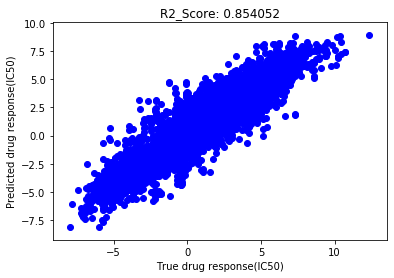

In [5]:
import os
import torch
from torch import nn, optim
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
from sklearn.preprocessing import Normalizer

from mlp_batchnorm import MLP_batchnorm
from mlp_simple import MLP_simple

from lantentDataset import LatentDataset

learning_rate = 0.001


#dataFile = os.path.join('.\\data', 'LatentVec_Drug+GeneExp(cgc+unsampledGene+unsampledDrug).txt')

dataFile = os.path.join('.\\data', 'Pancancer_LatentVec_Drug+GeneExp(cgc+eliminated+unsampledGene+unsampledDrug).txt')

num=0
while num<10:
    num += 1
    print("-----------------------------\n-------------"+str(num)+"---------------\n-----------------------------")

    data = pd.read_csv(open(dataFile), sep='\t')


    data = data.sample(frac=1).reset_index(drop=True)

    trainData = data.loc[: 11337, :]
    trainDataset = LatentDataset(trainData, train0val1test2=0)
    validationData = data.loc[11338: 12471, :]
    validationDataset = LatentDataset(validationData, train0val1test2=1)
    testData = data.loc[12472: 13605, :]
    testDataset = LatentDataset(testData, train0val1test2=2)

    trainLoader = DataLoader(trainDataset, batch_size=64, shuffle=True, drop_last=True)
    validationLoader = DataLoader(validationDataset, batch_size=1133, drop_last=True)
    testLoader = DataLoader(testDataset, batch_size=1132, drop_last=True)


    model = MLP_simple()
    '''
    for m in model.modules():
        if isinstance(m, (nn.Conv2d, nn.Linear)):
            nn.init.kaiming_normal_(m.weight, mode='fan_in')
    '''

    if torch.cuda.is_available():
        model = model.cuda()

    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.0005)


    epoch = 0
    bestR2 = -1
    bestLoss = 200
    bestEpoch = 0
    path = '.\\trainedModels\\'
    while epoch < 40:

        model.train()
        for batch in trainLoader:

            geLatentVec, dLatentVec, target = batch

            # if geLatentVec.shape[0] != 50:
            #     continue

            if torch.cuda.is_available():
                geLatentVec = geLatentVec.cuda()
                dLatentVec = dLatentVec.cuda()
                target = target.cuda()
            else:
                geLatentVec = Variable(geLatentVec)
                dLatentVec = Variable(dLatentVec)
                target = Variable(target)
            out = model(geLatentVec, dLatentVec)
            loss = criterion(out, target)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        epoch += 1
        if epoch % 2 == 0:

            model.eval()

            for batch in validationLoader:
                geLatentVec, dLatentVec, target = batch
                if torch.cuda.is_available():
                    geLatentVec = geLatentVec.cuda()
                    dLatentVec = dLatentVec.cuda()
                    target = target.cuda()

                out = model(geLatentVec, dLatentVec)

                out = out.data.cpu().numpy().tolist()
                target = target.cpu().numpy().tolist()
                r2 = r2_score(target, out)
                rmse = mean_squared_error(target, out)**0.5
                # SS_tot = torch.std(target)
                # SS_res = evalLoss

                print('epoch: {}, Validation Loss: {:.6f}, R2_Score: {:.6f}'.format(epoch, rmse, r2))
                if (r2 > bestR2 and epoch>20):
                    bestLoss = rmse
                    bestR2 = r2
                    bestEpoch = epoch
                    torch.save(model.state_dict(), path + 'modelParameters.pt')
                    print("Got a better model!")
            # print('epoch: {}, loss: {:.4}'.format(epoch, loss.data.item()))
        pass


    path = '.\\trainedModels\\'
    model.load_state_dict(torch.load(path + 'modelParameters.pt'))
    print('\nNow testing the best model on test dataset\n')
    model.eval()
    for batch in testLoader:
        geLatentVec, dLatentVec, target = batch
        if torch.cuda.is_available():
            geLatentVec = geLatentVec.cuda()
            dLatentVec = dLatentVec.cuda()
            target = target.cuda()

        out = model(geLatentVec, dLatentVec)

        out = out.data.cpu().numpy().tolist()
        target = target.cpu().numpy().tolist()
        r2 = r2_score(target, out)
        rmse = mean_squared_error(target, out) ** 0.5

        print('epoch: {}, Validation Loss: {:.6f}, R2_Score: {:.6f}'.format(bestEpoch, bestLoss, bestR2))
        print('Test Loss: {:.6f}, R2_Score: {:.6f}'.format(rmse, r2))

        with torch.no_grad():
            plt.scatter(target, out, c='b' )
            plt.xlabel("True drug response(IC50)")
            plt.ylabel("Predicted drug response(IC50)")
            plt.title('R2_Score: {:.6f}'.format(r2))
        
        
        df = pd.read_csv('.\\R2_Score(pan+cgc+eliminated+unsampledGene+unsampledDrug).txt', sep='\t')
        df = df.append({'id': int(len(df)),
                        'R2_test': r2,
                        'RMSE_test': rmse,
                        'R2_val': bestR2,
                        'RMSE_val': bestLoss,
                        'epoch': bestEpoch},
                        ignore_index=True)
        df.to_csv('.\\R2_Score(pan+cgc+eliminated+unsampledGene+unsampledDrug).txt', sep='\t', index=False)










In [ ]:
        with torch.no_grad():
            plt.scatter(target, out)
            plt.xlabel("true drug response")
            plt.ylabel("predicted drug response")
            plt.title('R2_Score: {:.6f}'.format(r2))

In [ ]:
import os
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
from sklearn.preprocessing import Normalizer


dataFile = os.path.join('data',
                        'LatentVec_Drug+GeneExp(cgc+eliminated+unsampledGene+unsampledDrug).txt')
data = pd.read_csv(open(dataFile), sep='\t')
#print(data.head())
drugIds = data.loc[: , 'DRUG_ID'].tolist()

drug = data[data.DRUG_ID==60].values.tolist()[0][1:]

distances = {}
print(drug[0])

for i in range(0, data.shape[0]):
    if i not in drugIds:
        continue
    temp = data.loc[data['DRUG_ID']==i].values.tolist()[0][1:]
    sum = 0
    for j in range(0,56):
        sum += (drug[0]-temp[0])**2
        pass

    sum **= 0.5
    distances[str(i)] = sum

distances = sorted(distances.items(), key = lambda x: x[1])
distances

#similarDrugs = [int(distances[i][0]) for i in range(0, 3)]

#pieces = data.loc[data['DRUG_ID'].isin(similarDrugs)]

#pieces